In [1]:
using Pkg, Revise
Pkg.activate("..")
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot

  Activating new project at `C:\Users\sutha\OneDrive\Documents\Kuliah\Skripsi\ClapeyronThermo Clapeyron.jl master examples`


PyPlot

In [2]:
like_parameter = """
Clapeyron Database File,,,,,,,,,,
SAFTgammaMie Like Parameters [csvtype = like,grouptype = SAFTgammaMie]
species,vst,S,lambda_r,lambda_a,sigma,epsilon,n_H,n_e1,n_e2,source
CH3,1,0.57255,15.05,6,4.0772,256.77,0,0,0,
CH2,1,0.22932,19.871,6,4.8801,473.39,0,0,0,
CH,1,0.0721,8,6,5.295,95.621,0,0,0,
C,1,0.04072,8,6,5.6571,50.02,0,0,0,
aCH,1,0.32184,14.756,6,4.0578,371.53,0,1,0,
aCCH2,1,0.20859,8.5433,6,5.2648,591.56,0,1,0,
aCCH,1,0.2065,8,6,4.3128,61.325,0,1,0,
CH2=,1,0.4489,20.271,6,4.3175,300.9,0,0,0,
CH=,1,0.20037,15.974,6,4.7488,952.54,0,0,0,
cCH2,1,0.24751,20.386,6,4.7852,477.36,0,0,0,
COOH,1,0.55593,8,6,4.3331,405.78,1,2,2,
CH3COCH3,3,0.72135,17.433,6,3.598,286.02,1,1,1,
COO,1,0.65264,31.189,6,3.9939,868.92,0,2,0,
H2O,1,1,17.02,6,3.0063,266.68,2,2,0,
CH3OH,2,0.83517,19.235,6,3.2462,307.69,1,2,0,
CH4,1,1,12.504,6,3.737,152.58,0,0,0,
CO2,2,0.8468,26.408,5.055,3.05,207.89,0,1,1,
OH,1,0.9634,20.702,6,2.799,410.31,1,2,0,
CH2OH,2,0.58538,22.699,6,3.4054,407.22,1,2,0,
CHOH,2,0.18963,18.185,6,4.5381,599.66,1,2,0,
NH2,1,0.79675,10.254,6,3.2477,284.78,2,1,0,
NH,1,0.36589,19.999,6,3.2568,100,1,1,0,
N,1,0.15069,8.8971,6,3.0755,62.971,0,1,0,
cNH,1,0.16529,19.491,6,4.981,631.92,1,1,0,
cN,1,0.0719,7.0024,6,4.612,174.04,0,1,0,
C=,1,0.1533,8,6,4.033,1500,0,0,0,
aCCH3,1,0.31655,23.627,6,5.4874,651.41,0,1,0,
aCOH,1,0.74544,19.205,6,3.3521,431.1,1,2,1,
cCH,1,0.0961,8,6,5.4116,699.92,0,0,0,
cCHNH,1,0.15346,9.2374,6,5.5,691.56,1,1,0,
cCHN,1,0.10264,8.0016,6,4.445,709.99,0,1,0,
aCCOaC,3,0.18086,9.8317,6,4.067,656.71,0,0,0,
aCCOOH,2,0.6553,8,6,3.3942,313.35,1,2,2,
aCNHaC,1,0.54263,8.2761,6,3.3218,303.35,1,1,0,
CH3CO,2,0.54685,19.05,6,3.9112,525.22,0,2,0,
[CH3][OCH2],1,0.40981,10.127,6,2.8566,330.18,0,0,0,
[CH2][OCH2],1,0.40981,10.127,6,2.8566,248.2,0,0,0,
cO,1,0.47500,26.870,6,3.0000,586.52,0,1,0,
CH2OE,1,0.22932,19.871,6,4.8801,473.39,0,0,0,
N2,1,1.4214,9.8749,6,3.1760,72.438,0,0,0,
H3O+,1,1,17.02,6,3.0063,68.181,3,0,0,
Li+,1,1,12,6,1.8,6.1036,0,0,0,
Na+,1,1,12,6,2.32,31.711,0,0,0,
K+,1,1,12,6,3.04,90.092,0,0,0,
Rb+,1,1,12,6,3.32,130.35,0,0,0,
Mg2+,1,1,12,6,1.72,89.259,0,0,0,
Ca2+,1,1,12,6,2.28,261.27,0,0,0,
Sr2+,1,1,12,6,2.64,305.77,0,0,0,
Ba2+,1,1,12,6,2.98,401.24,0,0,0,
N+,1,0.15069,8.8971,6,3.0755,62.971,1,0,0,
OH-,1,1,17.02,6,2.46,170.16,0,3,0,
F-,1,1,12,6,2.38,66.055,0,0,0,
Cl-,1,1,12,6,3.34,113.76,0,0,0,
Br-,1,1,12,6,3.64,107.38,0,0,0,
I-,1,1,12,6,4.12,102.89,0,0,0,
COO-,1,0.55593,8,6,4.3331,21.264,0,4,0,
HSO4-,1,1,12,6,4.12,82.082,0,0,0,
SO42-,1,1,12,6,4.6,70.322,0,4,0,
HNO3-,1,1.3452,16.347,6,3.619,496.33,1,3,0,
NO3-,1,1,12,6,3.58,97.848,0,3,0,
HCO3-,1,1,12,6,3.12,378.24,0,4,0,
CO32-,1,1,12,6,3.12,378.24,0,4,0,"""

unlike_parameter = """
Clapeyron Database File,,,,
SAFTgammaMie Unlike Parameters [csvtype = unlike,grouptype = SAFTgammaMie]
species1,species2,epsilon,lambda_r,source
CH3,CH2,350.77,,
CH3,CH,387.48,,
CH3,C,339.91,,
CH3,aCH,305.81,,
CH3,aCCH2,396.91,,
CH3,aCCH,455.85,,
CH3,CH2=,333.48,,
CH3,CH=,252.41,,
CH3,cCH2,355.95,,
CH3,COOH,255.99,,
CH3,CH3COCH3,233.48,14.449,
CH3,COO,402.75,,
CH3,H2O,358.18,100,
CH3,CH3OH,275.76,15.537,
CH3,CH4,193.97,12.628,
CH3,CO2,205.7,,
CH3,OH,314.67,,
CH3,CH2OH,333.2,,
CH3,CHOH,479.38,,
CH3,NH2,244.15,,
CH3,NH,530.87,,
CH3,N+,462.18,,
CH3,cNH,583.72,,
CH3,cN,710,,
CH3,C=,281.4,,
CH3,aCCH3,358.58,,
CH3,aCOH,413.25,,
CH3,cCH,690.17,,
CH3,cCHNH,406.97,,
CH3,cCHN,761.79,,
CH3,aCCOOH,370.75,,
CH3,aCNHaC,647.64,,
CH3,CH3CO,344.57,,
CH3,[CH3][OCH2],301.77,,
CH3,[CH2][OCH2],261.63,,
CH2,CH,506.21,,
CH2,C,300.07,,
CH2,aCH,415.64,,
CH2,aCCH2,454.16,,
CH2,aCCH,345.8,,
CH2,CH2=,386.8,,
CH2,CH=,459.4,,
CH2,cCH2,469.67,,
CH2,COOH,413.74,,
CH2,CH3COCH3,299.48,11.594,
CH2,COO,498.86,,
CH2,H2O,423.63,100,
CH2,CH3OH,341.41,17.05,
CH2,CH4,243.13,12.642,
CH2,CO2,276.45,,
CH2,OH,396.27,,
CH2,CH2OH,423.17,,
CH2,CHOH,517.64,,
CH2,NH2,348.39,,
CH2,NH,394.58,,
CH2,N+,348.3,,
CH2,cNH,429.49,,
CH2,cN,508.54,,
CH2,C=,286.58,,
CH2,aCCH3,569.18,,
CH2,aCOH,484.02,,
CH2,cCH,522.57,,
CH2,cCHNH,309.95,,
CH2,cCHN,893.5,,
CH2,aCCOOH,323.72,,
CH2,aCNHaC,347.75,,
CH2,CH3CO,431.49,,
CH2,[CH3][OCH2],408.05,,
CH2,[CH2][OCH2],353.78,,
CH,C,2,,
CH,aCH,441.43,,
CH,aCCH2,65.41,,
CH,aCCH,67.51,,
CH,CH2=,426.76,,
CH,CH=,502.99,,
CH,cCH2,570.45,,
CH,COOH,504.99,,
CH,CH3COCH3,637.29,,
CH,COO,353.65,,
CH,H2O,275.75,,
CH,OH,198.08,,
CH,CH2OH,329.22,,
CH,CHOH,0,,
CH,C=,378.72,,
CH,aCCOOH,0,,
CH,aCNHaC,878.88,,
CH,CH3CO,321.91,,
C,cCH2,0,,
C,COO,0,,
C,H2O,420.82,,
C,OH,0,,
C,CH2OH,0,,
C,CHOH,0,,
aCH,aCCH2,416.69,,
aCH,aCCH,429.16,,
aCH,COOH,331.61,9.0687,
aCH,CH3COCH3,333.11,,
aCH,H2O,357.78,38.64,
aCH,CH2OH,386.05,,
aCH,CHOH,512.16,,
aCH,aCCH3,471.23,,
aCH,aCOH,448.75,,
aCH,aCCOOH,340.7,,
aCH,aCNHaC,549.72,,
aCH,CH3CO,426.72,18.03,
aCCH2,aCCH,462.04,,
aCCH2,COOH,473.66,,
aCCH2,CH3COCH3,394.83,,
aCCH2,H2O,329.03,,
aCCH2,CH2OH,434.37,,
aCCH2,CHOH,357.91,,
aCCH2,aCCOOH,168.69,,
aCCH2,CH3CO,663.71,30.712,
aCCH,COOH,599.28,,
aCCH,CH3COCH3,459.22,,
aCCH,H2O,314.03,,
aCCH,CH2OH,436.14,,
aCCH,CHOH,138.39,,
CH2=,CH=,275.75,,
CH2=,CH3COCH3,288.2,,
CH2=,H2O,387.25,94.463,
CH2=,CH2OH,375.51,,
CH2=,CHOH,449.83,,
CH2=,C=,203.76,,
CH,cCH2,398.35,,
CH,COOH,453.13,,
CH,CH3COCH3,437.75,,
CH,COO,818.79,,
CH,H2O,332.21,17.309,
CH,OH,625.17,,
CH,CH2OH,414.91,,
CH,CHOH,540.83,,
CH,C=,1195.3,,
cCH2,CH3COCH3,352.19,,
cCH2,COO,498.6,,
cCH2,H2O,350.99,28,
cCH2,CO2,269.68,,
cCH2,OH,376.57,,
cCH2,CHOH,554.5,,
cCH2,NH2,332.15,,
cCH2,NH,549.43,,
cCH2,N+,650.24,,
cCH2,cNH,605.45,,
cCH2,cN,536.66,,
cCH2,C=,846.19,,
cCH2,cCH,321.71,,
cCH2,cCHNH,486.88,,
cCH2,cCHN,750.06,,
cCH2,aCCOOH,389.9,,
cCH2,aCNHaC,564.85,,
COOH,CH3COCH3,393.71,,
COOH,H2O,289.76,,
COOH,CH2OH,488.18,,
COOH,C=,609.87,,
CH3COCH3,COO,547.44,,
CH3COCH3,H2O,287.26,,
CH3COCH3,OH,340.81,,
CH3COCH3,CH2OH,338.47,,
CH3COCH3,CHOH,340.81,,
CH3COCH3,C=,516.31,,
CH3COCH3,aCOH,389.74,,
CH3COCH3,aCCOOH,316.6,,
CH3COCH3,aCNHaC,261.23,8,
COO,H2O,396.81,15.14,
COO,OH,490.95,,
COO,C=,868.11,,
COO,aCCOOH,331.78,,
COO,aCNHaC,809.96,,
H2O,CH3OH,278.45,,
H2O,CH4,175.41,,
H2O,CO2,226.38,,
H2O,OH,375.92,,
H2O,CH2OH,353.37,,
H2O,CHOH,479.16,,
H2O,NH2,358.55,,
H2O,NH,646.1,13.195,
H2O,N+,1481.3,21.217,
H2O,cNH,523.83,8.4243,
H2O,cN,2990,66.109,
H2O,C=,310.91,8,
H2O,aCCH3,360.7,,
H2O,aCOH,238.77,8,
H2O,cCH,377.16,22.265,
H2O,cCHNH,855.01,32.132,
H2O,cCHN,1067.9,8.001,
H2O,aCCOOH,228.58,9.5614,
CH3OH,CH4,233.21,,
CH3OH,CO2,157.83,8.3462,
CH3OH,aCCOOH,290.16,8,
CH3OH,aCNHaC,398.1,,
CH4,CO2,144.72,11.95,
CH4,[CH3][OCH2],210.13,,
CH4,[CH2][OCH2],182.18,,
CO2,NH2,200.62,49.975,
CO2,NH,100.01,49.529,
CO2,N+,100.58,49.999,
CO2,cNH,80.101,39.706,
CO2,cN,90.102,35.343,
CO2,cCH,294.99,,
CO2,cCHNH,100.53,31.234,
CO2,[CH3][OCH2],327.31,,
CO2,[CH2][OCH2],283.78,,
OH,NH2,241.94,,
OH,NH,188.61,,
OH,N+,260.99,,
OH,C=,784.51,,
CH2OH,CHOH,389.23,,
CH2OH,NH2,528.21,52.305,
CH2OH,NH,313.25,,
CH2OH,N+,440.99,,
CH2OH,C=,799.66,,
CH2OH,aCCH3,486.62,,
CH2OH,aCOH,307.89,41.331,
CH2OH,aCCOOH,172.57,9.2665,
CH2OH,aCNHaC,485.03,8.0012,
CHOH,C=,245.07,,
CHOH,aCCH3,762.86,,
CHOH,aCCOOH,81.542,79.266,
CHOH,aCNHaC,451.48,8.181,
NH2,NH,381.98,,
NH2,cCHNH,101.61,,
cNH,cN,812.26,,
aCCH3,aCCOOH,455.68,,
aCCH3,aCNHaC,941.03,,
aCCH3,CH3CO,552.62,36.429,
cCH,aCCOOH,246.61,,
aCCOOH,aCNHaC,102.98,,
aCCOOH,CH3CO,568.75,85,
aCNHaC,CH3CO,710.53,8,
cO,CH2OH,606.80,,
cO,H2O,350.09,14.872,
cO,CH2OE,325.94,10.054,
CH2OH,CH2OE,404.74,,
CH2OE,H2O,283.38,11.885,
Na+,COO-,9.911,,
H2O,Na+,539.68,,
H2O,COO-,171.61,,
CH3,COO-,509.37,,
H2O,Cl-,95.406,,
Na+,Cl-,27.937,,
H2O,Br-,112.01,,
H2O,HCO3-,317.43,,
H2O,CO32-,317.43,,
H3O+,HCO3-,130.28,,
H3O+,CO32-,130.28,,
Ca2+,OH-,77.226,,
OH-,HCO3-,230.25,14.233,
OH-,CO32-,230.25,14.233,
H2O,Ca2+,1460.8,,
"""

assoc_parameter = """
Clapeyron Database File,,,,,,
SaftVRMie Assoc Parameters [csvtype = assoc,grouptype = SAFTgammaMie]
species1,site1,species2,site2,epsilon_assoc,bondvol,source
aCH,e1,H2O,H,563.56,3.3961E-28,
aCH,e1,aCCOOH,H,3961.5,2.3401E-32,
aCCH2,e1,H2O,H,563.56,3.3961E-28,
aCCH2,e1,aCCOOH,H,3961.5,2.3401E-32,
aCCH,e1,H2O,H,563.56,3.3961E-28,
COOH,e1,COOH,H,6427.9,8.062E-31,
COOH,e1,H2O,H,1451.8,2.8089E-28,
COOH,e2,H2O,H,1252.6,1.5098E-28,
COOH,H,H2O,e1,2567.7,2.7009E-28,
COOH,e1,CH2OH,H,1062.1,2.1067E-28,
COOH,e2,CH2OH,H,997.89,2.2707E-28,
COOH,H,CH2OH,e1,3238.4,3.605E-29,
CH3COCH3,H,CH3COCH3,e1,980.2,2.8652E-27,
CH3COCH3,e1,H2O,H,1588.7,7.7277E-28,
CH3COCH3,e2,H2O,H,417.24,1.3043E-27,
CH3COCH3,H,H2O,e1,1386.8,1.8883E-28,
CH3COCH3,e1,OH,H,1492.9,9.8639E-28,
CH3COCH3,H,OH,e1,1177.4,3.2375E-28,
CH3COCH3,e1,CH2OH,H,1844.8,9.9195E-28,
CH3COCH3,H,CH2OH,e1,686.93,5.8599E-28,
CH3COCH3,e1,CHOH,H,1323.1,6.3537E-28,
CH3COCH3,H,CHOH,e1,1186.9,7.3108E-28,
CH3COCH3,e1,aCOH,H,2162.2,9.3551E-28,
CH3COCH3,H,aCOH,e1,1053.1,5E-28,
CH3COCH3,e1,aCCOOH,H,2732.9,4.7838E-28,
CH3COCH3,e1,aCNHaC,H,2208.9,7.5072E-28,
COO,e1,H2O,H,1245.8,4.5498E-28,
COO,e1,OH,H,1920.1,1.1485E-28,
COO,e1,aCCOOH,H,1772.3,9.4509E-28,
H2O,H,H2O,e1,1985.4,1.0169E-28,
H2O,e1,CH3OH,H,1993.5,1.0411E-28,
H2O,H,CH3OH,e1,1993.5,1.0411E-28,
H2O,e1,CO2,e1,1398.1,9.1419E-29,
H2O,e1,OH,H,500,1.3831E-27,
H2O,H,OH,e1,2225.6,1.1453E-28,
H2O,e1,CH2OH,H,621.68,4.25E-28,
H2O,H,CH2OH,e1,2153.2,1.474E-28,
H2O,e1,CHOH,H,2289.1,6.3813E-29,
H2O,H,CHOH,e1,2140.9,1.9478E-29,
H2O,e1,NH2,H,1988.3,5.5824E-29,
H2O,H,NH2,e1,1460,1.796E-28,
H2O,e1,NH,H,1064.5,4.0082E-28,
H2O,H,NH,e1,3890.4,9.28E-28,
H2O,H,N+,e1,2783.7,1.5536E-29,
H2O,e1,cNH,H,1701,1.6177E-30,
H2O,H,cNH,e1,2838.4,3.7395E-29,
H2O,H,cN,e1,5203.7,3.74E-32,
H2O,H,aCCH3,e1,563.56,3.3961E-28,
H2O,e1,aCOH,H,2500,5.247E-29,
H2O,H,aCOH,e1,1798.2,1.0392E-28,
H2O,H,aCOH,e2,563.56,3.3961E-28,
H2O,H,cCHNH,e1,5903.8,2.075E-33,
H2O,e1,cCHNH,H,5477.7,9.582E-33,
H2O,H,cCHN,e1,4115.4,2.307E-31,
H2O,H,HNO3,e1,2900,3.8401E-29,
H2O,e1,HNO3,H,1606.6,3.8401E-29,
H2O,H,aCCOOH,e1,882.05,9.8434E-28,
H2O,H,aCCOOH,e2,882.05,9.8434E-28,
H2O,H,COO-,e1,802.21,52.555e-30,
H2O,e1,aCCOOH,H,5192.5,1.1186E-32,
CH3OH,H,CH3OH,e1,2062.1,1.0657E-28,
CH3OH,H,aCCOOH,e1,1400.7,4.9532E-28,
CH3OH,e1,aCCOOH,H,871.46,2.5605E-31,
CH3OH,H,aCNHaC,e1,2346,3.1536E-30,
CH3OH,e1,aCNHaC,H,2346,3.1536E-30,
CO2,e1,NH2,e1,4023.9,1.2035E-28,
CO2,e2,NH2,e1,5981.4,1.0036E-30,
CO2,e1,NH,e1,6012.1,1.4157E-31,
CO2,e2,NH,e1,7420.5,4.3534E-31,
CO2,e1,N,e1,4270.8,4.634E-31,
CO2,e2,N,e1,7439.8,6.748E-33,
CO2,e1,cNH,e1,5696.6,4.6758E-30,
CO2,e2,cNH,e1,6017.9,1.1003E-30,
CO2,e1,cN,e1,3388.6,1.031E-27,
CO2,e2,cN,e1,3004.9,6.5921E-28,
CO2,e1,cCHNH,e1,2246,1.4057E-31,
CO2,e2,cCHNH,e1,3870.8,6.4457E-27,
OH,H,OH,e1,2161,5.4398E-29,
OH,H,NH2,e1,1282.7,2.5428E-28,
OH,e1,NH2,H,1354,1.4135E-28,
OH,e1,NH,H,861.12,5.5632E-28,
OH,H,NH,e1,1477.7,4.4981E-28,
OH,H,N,e1,1357.2,5.9919E-28,
CH2OH,H,CH2OH,e1,2097.9,6.2309E-29,
CH2OH,e1,CHOH,H,1464.1,5.9155E-28,
CH2OH,H,CHOH,e1,2500,1.0444E-29,
CH2OH,e1,NH2,H,629.88,3.4608E-28,
CH2OH,H,NH2,e1,2403.8,2.6192E-29,
CH2OH,e1,NH,H,341.13,1.4998E-27,
CH2OH,H,NH,e1,1390.1,9.4793E-28,
CH2OH,H,N,e1,1247.2,2.8683E-28,
CH2OH,H,N+,e1,1247.2,2.8683E-28,
CH2OH,e1,aCOH,H,2182.7,4.026E-28,
CH2OH,H,aCOH,e1,250.03,2.5E-29,
CH2OH,H,aCCOOH,e1,1284.9,2.9788E-27,
CH2OH,H,aCCOOH,e2,3889.3,4.3712E-31,
CH2OH,e1,aCCOOH,H,1284.9,2.9788E-27,
CHOH,H,CHOH,e1,2480.6,8.474E-30,
CHOH,H,aCCOOH,e1,2278.5,7.3698E-29,
CHOH,H,aCCOOH,e2,2278.5,7.3698E-29,
CHOH,e1,aCCOOH,H,2278.5,7.3698E-29,
NH2,e1,NH2,H,1070.8,9.5225E-29,
NH2,H,NH,e1,1639.9,3.79E-29,
NH2,e1,NH,H,1682.1,5.82E-31,
NH,e1,NH,H,1370.3,1.0062E-29,
cNH,H,cNH,e1,1511.6,8.7651E-29,
cNH,H,cN,e1,901.35,1.1555E-30,
aCCH3,e1,aCCOOH,H,3961.5,2.3401E-32,
aCOH,H,aCOH,e1,1538.1,2.7586E-28,
cCHNH,e1,cCHNH,H,1293.5,4.3849E-28,
HNO3,H,HNO3,e1,1300,8.9978E-30,
aCCOOH,H,aCCOOH,H,4745.7,1.004E-29,
aCCOOH,H,aCNHaC,e1,2424.1,9.9046E-28,
aCCOOH,H,CH3CO,e1,2828.1,4.7677E-29,
cO,e1,H2O,H,2193.2,50.010e-30,
cO,e1,CH2OH,H,1472.5,433.15e-30,
H2O,O,HCO3-,e,1398.1,91.419e-30,10.1080/00268976.2015.1029027
H2O,O,CO32-,e,1398.1,91.419e-30,10.1080/00268976.2015.1029027
"""

glycine_data = """
Clapeyron Database File
SolidHfus Like Parameters
species,Mw,Tm,Hfus,CpSL
glycine,75.0666,520.8111111,31050,
"""

components = [("water", ["H2O"=>1]), ("glycine", ["N+"=>1, "CH2"=>1, "COO-"=>1])]

model = CompositeModel(components;
                       fluid = SAFTgammaMie,
                       solid = SolidHfus,
                       solid_userlocations = [glycine_data],
                       fluid_userlocations = [like_parameter,unlike_parameter,assoc_parameter])

Composite Model with 2 components:
 "water"
 "glycine"
Solid Model: SolidHfus("water", "glycine")
Fluid Model: SAFTgammaMie{BasicIdeal, Float64}("water", "glycine")

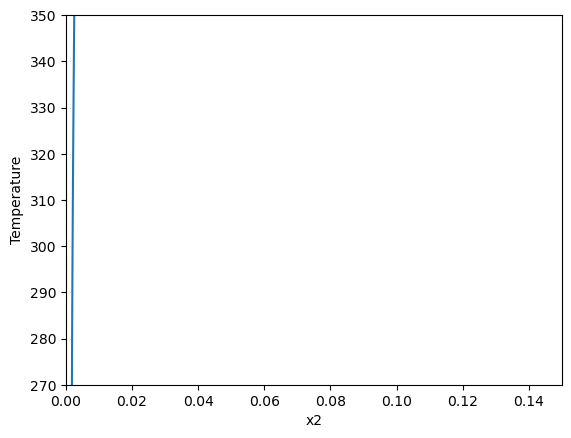

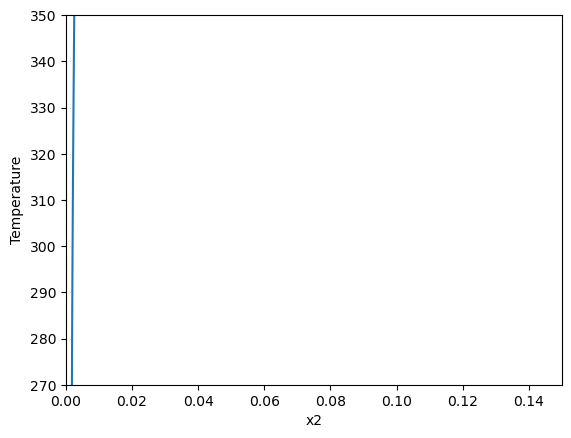

In [3]:
using Clapeyron

T = LinRange(270.,350.,10)
p = 100000 

s = zeros(length(T))

for i in 1:length(T)
    s[i] = sle_solubility(model,p,T[i],[1.,1.];solute=["glycine"])[2]
end

plt.clf()
plt.plot(s,T)
plt.xlabel("x2")
plt.ylabel("Temperature")
plt.xlim(0,0.15)
plt.ylim(270,350)
display(plt.gcf())